Özgür Güneşhan 19242
Ali Metehan Gencmazlumo 19041

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from datetime import datetime
import seaborn as sns  # a visualization library based on matplotlib
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

sns.set(style="darkgrid")

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [4]:
from os.path import join

In [5]:


filename1 = 'features.csv'
filename2 = 'train.csv'
filename3 = 'stores.csv'

df1 = pd.read_csv(filename1,sep=';')
df2 = pd.read_csv(filename2,sep=';')
df3 = pd.read_csv(filename3,sep=';')


## Combining & Exploring different database

In [6]:
df1.shape

(7372, 6)

In [7]:
df2.shape

(421570, 5)

In [8]:
df3.shape

(45, 3)

In [9]:
df2.sort_values(by='Date').head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday
381747,41,6,01/04/11,4331.51,False
151753,16,28,01/04/11,245.56,False
232061,24,38,01/04/11,57064.38,False


In [10]:
df3.head(3)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392


In [11]:
Data=df1.merge(df2,how='outer', on = ['Store','Date'])

In [12]:
Data=Data.merge(df3,how='outer',on = ['Store'])

In [13]:
from datetime import datetime 
Data['Datetime']=pd.to_datetime(Data['Date'])


In [14]:
Data['year']=Data['Datetime'].dt.year
Data['month']=Data['Datetime'].dt.month
Data['monthday']=Data['Datetime'].dt.day
Data['weekday']=Data['Datetime'].dt.weekday
Data.head(10)


,Store,Date,Temperature,Fuel_Price,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size,Datetime,year,month,monthday,weekday
0,1,19/02/10,"39,93",2.514,8.106,False,1.0,41595.55,False,A,151315,2010-02-19,2010,2,19,4
1,1,19/02/10,"39,93",2.514,8.106,False,2.0,47928.89,False,A,151315,2010-02-19,2010,2,19,4
2,1,19/02/10,"39,93",2.514,8.106,False,3.0,11523.47,False,A,151315,2010-02-19,2010,2,19,4
3,1,19/02/10,"39,93",2.514,8.106,False,4.0,36826.95,False,A,151315,2010-02-19,2010,2,19,4
4,1,19/02/10,"39,93",2.514,8.106,False,5.0,26468.27,False,A,151315,2010-02-19,2010,2,19,4
5,1,19/02/10,"39,93",2.514,8.106,False,6.0,6060.26,False,A,151315,2010-02-19,2010,2,19,4
6,1,19/02/10,"39,93",2.514,8.106,False,7.0,19985.20,False,A,151315,2010-02-19,2010,2,19,4
7,1,19/02/10,"39,93",2.514,8.106,False,8.0,38717.60,False,A,151315,2010-02-19,2010,2,19,4
8,1,19/02/10,"39,93",2.514,8.106,False,9.0,15880.85,False,A,151315,2010-02-19,2010,2,19,4
9,1,19/02/10,"39,93",2.514,8.106,False,10.0,29634.13,False,A,151315,2010-02-19,2010,2,19,4


In [15]:
Data.describe()

,Store,Fuel_Price,Unemployment,Dept,Weekly_Sales,Size,year,month,monthday,weekday
count,423193.000000,378159.000000,377634.000000,421570.000000,421570.000000,423193.000000,423193.000000,423193.000000,423193.000000,423193.000000
mean,22.203401,3.368936,14.181528,44.260317,15981.258123,136702.053482,2010.975510,6.477555,15.641270,3.572134
std,12.786392,0.460079,222.916603,30.492054,22711.183519,60990.805721,0.803544,3.325971,8.755914,1.426931
min,1.000000,2.514000,3.684000,1.000000,-4988.940000,34875.000000,2010.000000,1.000000,1.000000,0.000000
25%,11.000000,2.938000,6.891000,18.000000,2079.650000,93638.000000,2010.000000,4.000000,8.000000,4.000000
50%,22.000000,3.459000,7.866000,37.000000,7612.030000,140167.000000,2011.000000,6.000000,16.000000,4.000000
75%,33.000000,3.743000,8.567000,74.000000,20205.852500,202505.000000,2012.000000,9.000000,23.000000,4.000000
max,45.000000,4.468000,8000.000000,99.000000,693099.360000,219622.000000,2013.000000,12.000000,31.000000,6.000000


In [16]:
def scatter(Data, column):
    plt.figure()
    plt.scatter(Data[column] , Data['Weekly_Sales'])
    plt.ylabel('Weekly_Sales')
    plt.xlabel(column)

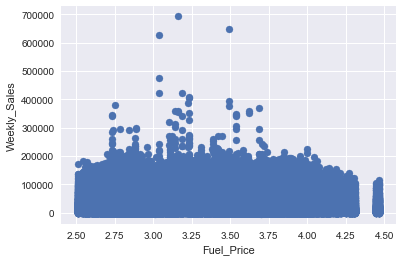

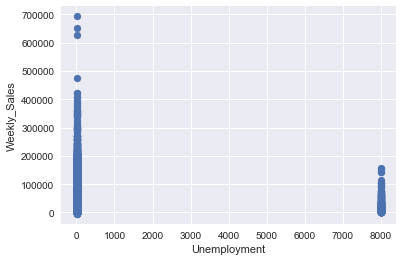

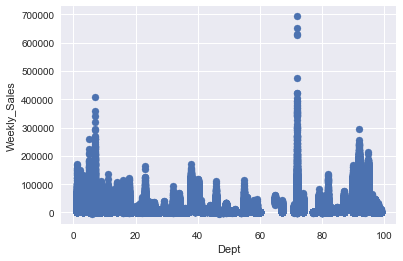

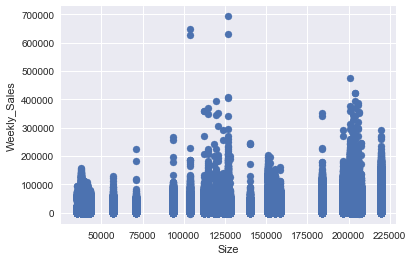

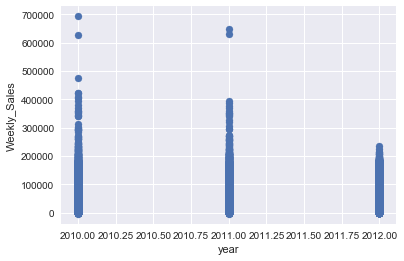

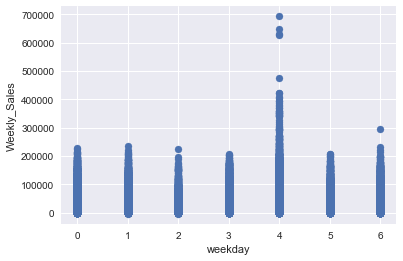

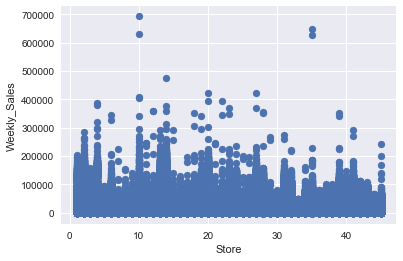

In [17]:
scatter(Data, 'Fuel_Price')
scatter(Data, 'Unemployment')
scatter(Data, 'Dept')
scatter(Data, 'Size')
scatter(Data, 'year')
scatter(Data, 'weekday')
scatter(Data, 'Store')




In [18]:

print("Structure of Data:\n",Data.shape, "\n")
print("Number of missing values:\n",Data.isnull().sum().sort_values(ascending=False),"\n")

Structure of Data:
 (423193, 16) 

Number of missing values:
 Unemployment    45559
IsHoliday_x     45034
Fuel_Price      45034
Temperature     45034
IsHoliday_y      1623
Weekly_Sales     1623
Dept             1623
weekday             0
monthday            0
month               0
year                0
Datetime            0
Size                0
Type                0
Date                0
Store               0
dtype: int64 



In [19]:
Data_percent_missing = Data.isnull().sum()*100/len(Data)
data_type = Data.dtypes

data_summary = pd.DataFrame({"Percent_missing": Data_percent_missing.round(2), 
                               "Datatypes": data_type})

data_summary

,Percent_missing,Datatypes
Store,0.00,int64
Date,0.00,object
Temperature,10.64,object
Fuel_Price,10.64,float64
Unemployment,10.77,float64
IsHoliday_x,10.64,object
Dept,0.38,float64
Weekly_Sales,0.38,float64
IsHoliday_y,0.38,object
Type,0.00,object



In final we have 16 feature. 5 of them is for date time. 5 of them is continius values, 5 of them is categorical (nominal), 


In [20]:
Data['month'].unique()

array([ 2, 12, 10,  5,  3,  9,  1,  7,  8,  6, 11,  4])

##  Build Hypothesis Test

Our first hypothesis is weekly sales are changes according to the different months. Then, 
h0 = Months did not affect weekly sales
h1= Months affect week sales
We are going to apply anova and if p value is going to be less than .05 we are going to reject null hypothesis.


In [21]:
Sample1=Data[Data['month']==1]['Weekly_Sales']
Sample2=Data[Data['month']==2]['Weekly_Sales']
Sample3=Data[Data['month']==3]['Weekly_Sales']
Sample4=Data[Data['month']==4]['Weekly_Sales']
Sample5=Data[Data['month']==5]['Weekly_Sales']
Sample6=Data[Data['month']==6]['Weekly_Sales']
Sample7=Data[Data['month']==7]['Weekly_Sales']
Sample8=Data[Data['month']==8]['Weekly_Sales']
Sample9=Data[Data['month']==9]['Weekly_Sales']
Sample10=Data[Data['month']==10]['Weekly_Sales']
Sample11=Data[Data['month']==11]['Weekly_Sales']
Sample12=Data[Data['month']==12]['Weekly_Sales']
Sample1=Sample1.fillna(Sample1.mean())
Sample2=Sample2.fillna(Sample2.mean())
Sample3=Sample3.fillna(Sample3.mean())
Sample4=Sample4.fillna(Sample4.mean())
Sample5=Sample5.fillna(Sample5.mean())
Sample6=Sample6.fillna(Sample6.mean())
Sample7=Sample7.fillna(Sample7.mean())
Sample8=Sample8.fillna(Sample8.mean())
Sample9=Sample9.fillna(Sample9.mean())
Sample10=Sample10.fillna(Sample10.mean())
Sample11=Sample11.fillna(Sample11.mean())
Sample12=Sample12.fillna(Sample12.mean())

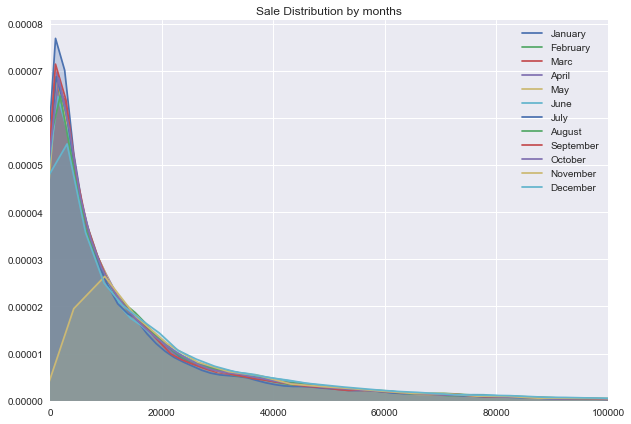

In [22]:
fig, ax = plt.subplots(1,1, figsize=(10,7))

sns.kdeplot(Sample1, shade=True, ax=ax, label="January")
sns.kdeplot(Sample2, shade=True, ax=ax, label="February")
sns.kdeplot(Sample3, shade=True, ax=ax, label="Marc")
sns.kdeplot(Sample4, shade=True, ax=ax, label="April")
sns.kdeplot(Sample5, shade=True, ax=ax, label="May")
sns.kdeplot(Sample6, shade=True, ax=ax, label="June")
sns.kdeplot(Sample7, shade=True, ax=ax, label="July")
sns.kdeplot(Sample8, shade=True, ax=ax, label="August")
sns.kdeplot(Sample9, shade=True, ax=ax, label="September")
sns.kdeplot(Sample10, shade=True, ax=ax, label="October")
sns.kdeplot(Sample11, shade=True, ax=ax, label="November")
sns.kdeplot(Sample12, shade=True, ax=ax, label="December")
plt.xlim(0,100000)
plt.title("Sale Distribution by months")
plt.show()

In [23]:
stats.f_oneway(Sample1, Sample2, Sample3,Sample4,Sample5,Sample6,Sample7,Sample8,Sample9,Sample10,Sample11,Sample12)

F_onewayResult(statistic=58.135553394144466, pvalue=6.267078551449746e-130)

As conclude, we can reject the null hypothesis and say that month is one of the factor that changes weekly sales.

In [24]:
# Importing the necessary modules for Linear Regression
from sklearn import linear_model
lr = linear_model.LinearRegression()

# Extracting Null Values

In [25]:
data2 =Data.dropna()

In [26]:
data2.dtypes

Store                    int64
Date                    object
Temperature             object
Fuel_Price             float64
Unemployment           float64
IsHoliday_x             object
Dept                   float64
Weekly_Sales           float64
IsHoliday_y             object
Type                    object
Size                     int64
Datetime        datetime64[ns]
year                     int64
month                    int64
monthday                 int64
weekday                  int64
dtype: object

In [27]:
X = data2[['Fuel_Price','Unemployment','Size']]

y= data2[['Weekly_Sales']]

In [28]:
from sklearn.model_selection import train_test_split


In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [30]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
lm.coef_

array([[-1.77030647e+02,  4.55715602e-02,  9.11597531e-02]])

In [32]:
lm.intercept_


array([4093.16266403])

In [33]:
for index, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, lm.coef_[0][index]))

The coefficient for Fuel_Price is -177.0306470050905
The coefficient for Unemployment is 0.0455715602093236
The coefficient for Size is 0.09115975314218039


In [34]:
lm.score(X_test, y_test)

0.05941350341809082

In [35]:
from sklearn.metrics import mean_squared_error

y_predict = lm.predict(X_test)

lr_mse = mean_squared_error(y_predict, y_test)

print(lr_mse)

488835588.5835735


# One hot Encode


In [36]:
#Changing type of temperature column 
data2['Temperature'] = [x.replace(',', '.') for x in data2['Temperature']]

data2['Temperature'] = data2['Temperature'].astype(float)

In [37]:
data2.dtypes

Store                    int64
Date                    object
Temperature            float64
Fuel_Price             float64
Unemployment           float64
IsHoliday_x             object
Dept                   float64
Weekly_Sales           float64
IsHoliday_y             object
Type                    object
Size                     int64
Datetime        datetime64[ns]
year                     int64
month                    int64
monthday                 int64
weekday                  int64
dtype: object

In [38]:
data2.drop(["Date","Datetime"], axis=1, inplace=True)


In [39]:
data2.head(10)

,Store,Temperature,Fuel_Price,Unemployment,IsHoliday_x,Dept,Weekly_Sales,IsHoliday_y,Type,Size,year,month,monthday,weekday
0,1,39.93,2.514,8.106,False,1.0,41595.55,False,A,151315,2010,2,19,4
1,1,39.93,2.514,8.106,False,2.0,47928.89,False,A,151315,2010,2,19,4
2,1,39.93,2.514,8.106,False,3.0,11523.47,False,A,151315,2010,2,19,4
3,1,39.93,2.514,8.106,False,4.0,36826.95,False,A,151315,2010,2,19,4
4,1,39.93,2.514,8.106,False,5.0,26468.27,False,A,151315,2010,2,19,4
5,1,39.93,2.514,8.106,False,6.0,6060.26,False,A,151315,2010,2,19,4
6,1,39.93,2.514,8.106,False,7.0,19985.20,False,A,151315,2010,2,19,4
7,1,39.93,2.514,8.106,False,8.0,38717.60,False,A,151315,2010,2,19,4
8,1,39.93,2.514,8.106,False,9.0,15880.85,False,A,151315,2010,2,19,4
9,1,39.93,2.514,8.106,False,10.0,29634.13,False,A,151315,2010,2,19,4


In [40]:
# get target attribute
target = data2["Weekly_Sales"]
# remove target attribute from the dataframe
data2.drop(["Weekly_Sales"], axis=1, inplace=True)

In [41]:
# select object type columns as a dataframe
data2_obj = data2.select_dtypes(include='object')

# let's remove those attributes from the main df
data2.drop(list(data2_obj.columns), axis=1, inplace=True)

# resulting object dtyped dataframe
data2_obj.head()

,IsHoliday_x,IsHoliday_y,Type
0,False,False,A
1,False,False,A
2,False,False,A
3,False,False,A
4,False,False,A


In [42]:
# get one-hot encoded representation of the categorical attributes
onehot_encoded = pd.get_dummies(data2_obj)

onehot_encoded.head()

,IsHoliday_x_False,IsHoliday_x_True,IsHoliday_y_False,IsHoliday_y_True,Type_A,Type_B,Type_C
0,1,0,1,0,1,0,0
1,1,0,1,0,1,0,0
2,1,0,1,0,1,0,0
3,1,0,1,0,1,0,0
4,1,0,1,0,1,0,0


In [43]:
# merge onehot encoded dataframe and the original one
onehot_data2 = pd.concat([data2, onehot_encoded], axis=1)

onehot_data2.tail(10)

X = onehot_data2.drop(['year'],axis=1) # this the our feature set for estımating weekly 'sales'
Y= target # target Future


## Applying Machine Learning Models
### 1- Decision Tree

In [44]:
# dividing the dataset
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

In [45]:
# create the model
from sklearn import tree

dt_model = tree.DecisionTreeRegressor()




In [46]:
# training the model
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [47]:
dt_pred = dt_model.predict(X_test)
print("First Ten Predicted Weekly Sales:",dt_pred[:10])
print("First Ten Actual Weekly Sales:",np.array(y_test[:10]))

First Ten Predicted Weekly Sales: [ 2530.5   6131.15 12369.    4428.89   116.16 32025.01  9363.     150.73
  4343.88  3591.3 ]
First Ten Actual Weekly Sales: [ 3407.5   3679.02 19669.06  4454.74    91.7  31541.73 13591.15   157.75
  4099.37  3393.82]


### We use Root mean Squared Error as a Performance Metric

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt

print("Root Mean Square Error of Decision Tree Model:", sqrt(mean_squared_error(y_test, dt_pred)))



Root Mean Square Error of Decision Tree Model: 5645.855715358318


In [49]:
dt_model.feature_importances_  # resulting feature importances

array([6.16871721e-02, 1.54011323e-02, 7.82691063e-03, 1.75091571e-02,
       6.12168620e-01, 2.17586855e-01, 2.17774080e-02, 2.48173892e-02,
       1.55926506e-03, 4.01242966e-04, 3.03566494e-03, 3.77457053e-04,
       2.04357832e-03, 3.05083576e-03, 1.00597965e-02, 6.97514952e-04])

In [50]:
tree.export_graphviz(dt_model,out_file='tree.dot')  

In [51]:
!pip install "pydot"


You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


### Applying Knn Regressor

In [52]:

from sklearn.neighbors import KNeighborsRegressor


In [53]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    KNNmodel = KNeighborsRegressor(n_neighbors = K)

    KNNmodel.fit(X_train, y_train)  #fit the model
    pred=KNNmodel.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 24861.536899271305
RMSE value for k=  2 is: 20473.21658556146
RMSE value for k=  3 is: 18749.459000324245
RMSE value for k=  4 is: 17944.080617464155
RMSE value for k=  5 is: 17485.930555204635
RMSE value for k=  6 is: 17239.044142505896
RMSE value for k=  7 is: 17079.867887274846
RMSE value for k=  8 is: 17003.657393666646
RMSE value for k=  9 is: 16944.06171801722
RMSE value for k=  10 is: 16882.906959317694
RMSE value for k=  11 is: 16852.52218462779
RMSE value for k=  12 is: 16837.91354246496
RMSE value for k=  13 is: 16820.92120495219
RMSE value for k=  14 is: 16824.0984690098
RMSE value for k=  15 is: 16828.249897484315
RMSE value for k=  16 is: 16844.53622763688
RMSE value for k=  17 is: 16859.41290797706
RMSE value for k=  18 is: 16864.088950752994
RMSE value for k=  19 is: 16878.58609100768
RMSE value for k=  20 is: 16892.31039589237


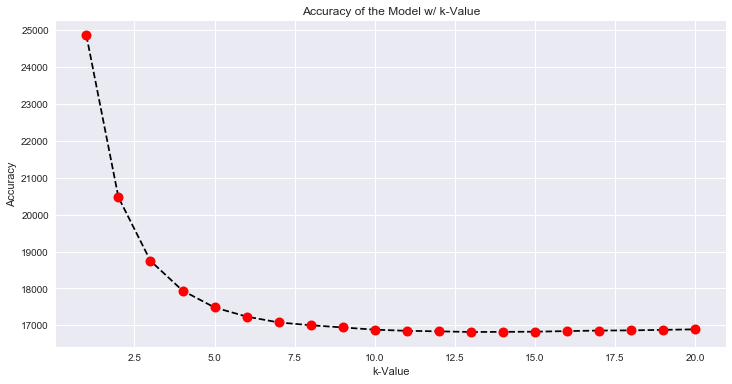

In [54]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21), rmse_val, color='black', linestyle='dashed', marker='o',  markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()

In [55]:
### Now we are going to normalize our data in order to boost the accuracy of Knn but we are onlly apply this for k= 13

In [56]:
X_norm = (X-X.mean()) / X.std()
Y= target # target Future


Y.head(10)

0    41595.55
1    47928.89
2    11523.47
3    36826.95
4    26468.27
5     6060.26
6    19985.20
7    38717.60
8    15880.85
9    29634.13
Name: Weekly_Sales, dtype: float64

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size= 0.25, random_state = 42)


In [58]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    KNNmodel = KNeighborsRegressor(n_neighbors = K)

    KNNmodel.fit(X_train, y_train)  #fit the model
    pred=KNNmodel.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 25607.212191204577
RMSE value for k=  2 is: 21594.671955955942
RMSE value for k=  3 is: 20368.430119360917
RMSE value for k=  4 is: 19942.31098588376
RMSE value for k=  5 is: 19881.603887861565
RMSE value for k=  6 is: 19883.751998989195
RMSE value for k=  7 is: 19893.151392891716
RMSE value for k=  8 is: 19886.554831238285
RMSE value for k=  9 is: 19882.15445249255
RMSE value for k=  10 is: 19836.95229108255
RMSE value for k=  11 is: 19754.571943552837
RMSE value for k=  12 is: 19652.782381491863
RMSE value for k=  13 is: 19540.607581405216
RMSE value for k=  14 is: 19433.512128480506
RMSE value for k=  15 is: 19346.041683106294
RMSE value for k=  16 is: 19286.77797986929
RMSE value for k=  17 is: 19246.477183992825
RMSE value for k=  18 is: 19241.481116149873
RMSE value for k=  19 is: 19250.748771307357
RMSE value for k=  20 is: 19264.023392567


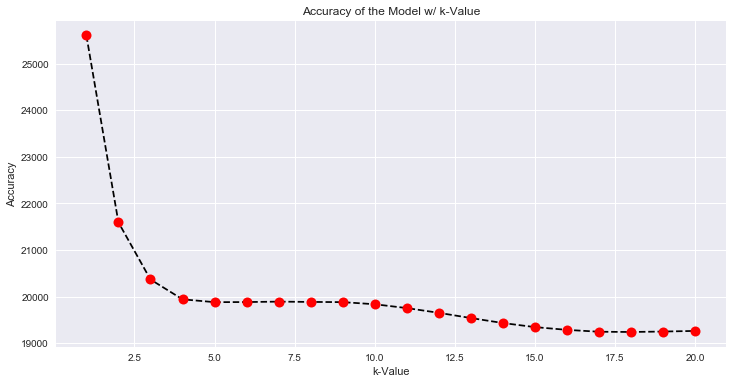

In [59]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21), rmse_val, color='black', linestyle='dashed', marker='o',  markerfacecolor='red', markersize=10)
plt.title('Accuracy of the Model w/ k-Value')  
plt.xlabel('k-Value')  
plt.ylabel('Accuracy') 
plt.show()